# Data Preprocessing

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt



### Test Librosa

✅ Loaded: train_9493.wav | Samples: 96001 | Sample Rate: 16000
✅ Loaded: train_9494.wav | Samples: 64801 | Sample Rate: 16000
✅ Loaded: train_9496.wav | Samples: 161601 | Sample Rate: 16000


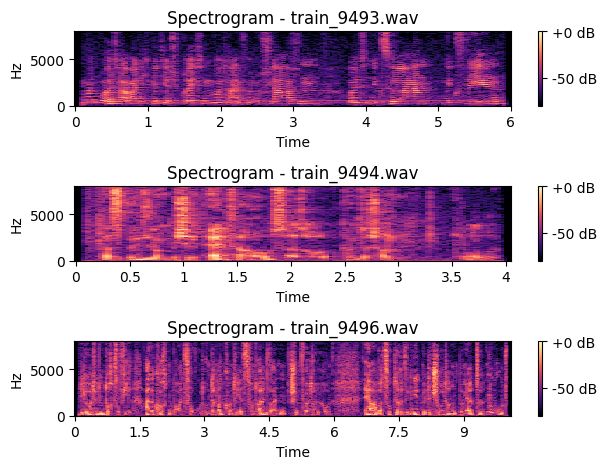

In [9]:
file_path = 'ppl_dataset/'  # Path to your audio file
data_split = ['train', 'val', 'test']  # List of data splits
n =3  # Number of files to load

wav_files = sorted([f for f in os.listdir(os.path.join(file_path, 'train')) if f.endswith('.wav')])[:n]

audio_data = []  

for wav_file in wav_files:
    full_path = os.path.join((os.path.join(file_path, 'train')), wav_file)
    y, sr = librosa.load(full_path, sr=None)
    audio_data.append((y, sr, wav_file))
    print(f"✅ Loaded: {wav_file} | Samples: {len(y)} | Sample Rate: {sr}")

for i, (y, sr, filename) in enumerate(audio_data):
    plt.subplot(n, 1, i + 1)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {filename}")

plt.tight_layout()
plt.savefig("spectrograms.png", dpi=300)
plt.show()

## Denoising

## Loudness Normalization

## Resampling

## Pre-emphasis filter